# Flight Price Predictions

## Regression Model

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing required sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

# ignoring harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting maximum columns for display
pd.set_option('display.max_columns',None)

# Overview of the Dataset

In [3]:
# importing the dataset
df=pd.read_csv('Flight_Price_Train.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Cleaning

In [5]:
# dropping the null values
df.dropna(inplace=True)

### Analyzing each columns


In [6]:
# Airline Column

df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [7]:
# Source Column

df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [8]:
# Destination column

df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


In [9]:
# Renaming the value

df['Destination']=df['Destination'].str.replace("New Delhi",'Delhi')

In [10]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,2197
Hyderabad,697
Kolkata,381


In [11]:
# Date_of_Journey Column

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

In [12]:
df['Journey_date']=df['Date_of_Journey'].dt.day

In [13]:
df['Journey_month']=df['Date_of_Journey'].dt.month

In [14]:
df['Journey_year']=df['Date_of_Journey'].dt.year

In [15]:
df['Journey_year'].value_counts()

,count
Journey_year,
2019,10682


In [16]:
df.drop(['Date_of_Journey','Journey_year'],axis=1,inplace=True)

In [17]:
# Departure_time Column

df['Departime_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Departime_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.drop('Dep_Time',axis=1,inplace=True)

In [19]:
# Arrival_Time Column

df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
# Duration Column

duration_time=list(df['Duration'])

In [22]:
# making in hour and minute format in every value
for i in range(len(duration_time)):
  if len(duration_time[i].split())==1:
    if 'h' in duration_time[i]:
      duration_time[i]=duration_time[i]+' 0m'
    else:
      duration_time[i]='0h '+duration_time[i]

In [23]:
# splitting hour and minute
duration_hour=[]
duration_minute=[]

for i in range(len(duration_time)):
  duration_hour.append(int(duration_time[i].split(sep='h')[0]))
  duration_minute.append(int(duration_time[i].split(sep='m')[0].split()[-1]))

In [24]:
df['duration_hour']=duration_hour

In [25]:
df['duration_minute']=duration_minute

In [26]:
df.drop('Duration',axis=1,inplace=True)

In [27]:
# Total_Stops Column

df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [28]:
df['Total_Stops']=df['Total_Stops'].apply(lambda x:0 if x=='non-stop' else int(x.split()[0]))

In [29]:
# Dropping route and additional info column

df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [30]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Departime_hour,Departime_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,11,30,14,10,2,40


# Exploratory Data Analysis

In [31]:
# Overview of the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  int64 
 4   Price             10682 non-null  int64 
 5   Journey_date      10682 non-null  int32 
 6   Journey_month     10682 non-null  int32 
 7   Departime_hour    10682 non-null  int32 
 8   Departime_minute  10682 non-null  int32 
 9   Arrival_hour      10682 non-null  int32 
 10  Arrival_minute    10682 non-null  int32 
 11  duration_hour     10682 non-null  int64 
 12  duration_minute   10682 non-null  int64 
dtypes: int32(6), int64(4), object(3)
memory usage: 918.0+ KB


## Univariet Analysis

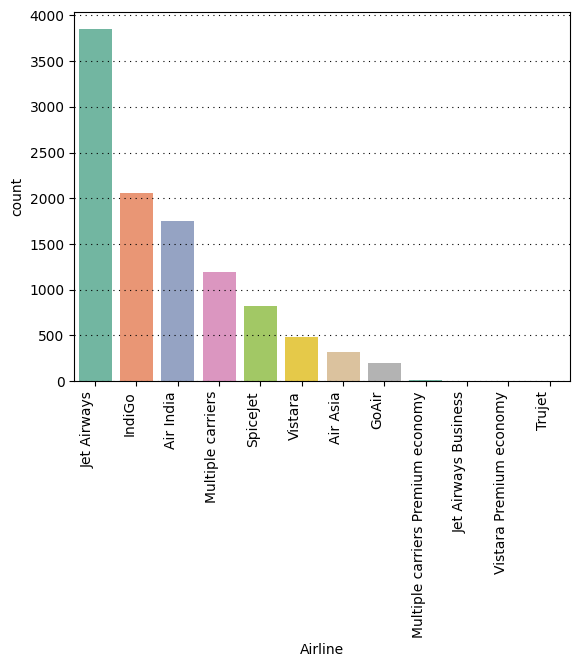

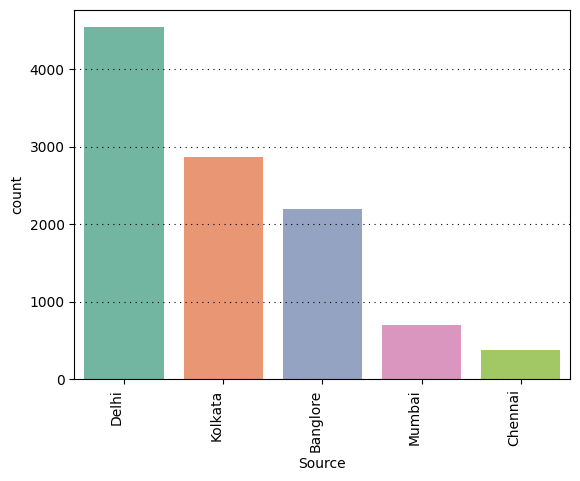

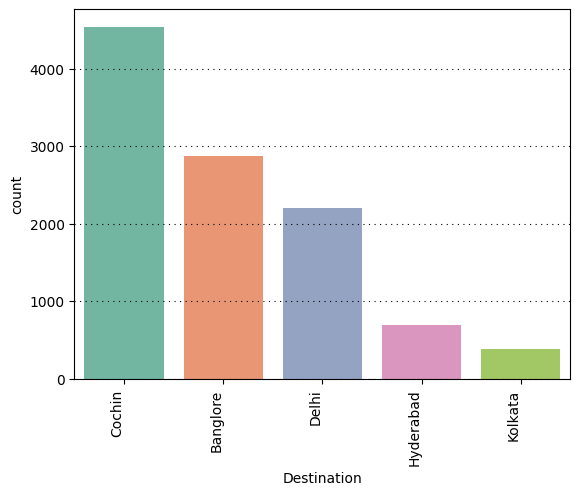

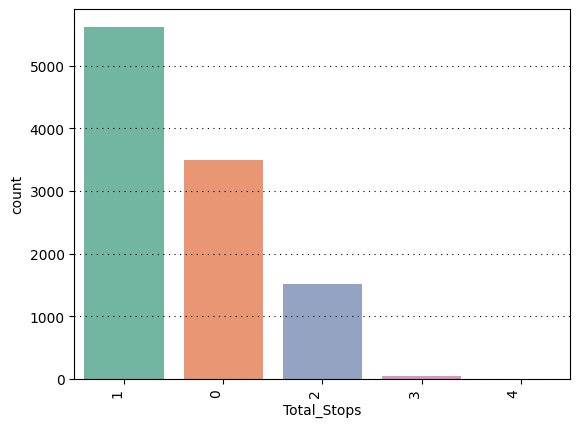

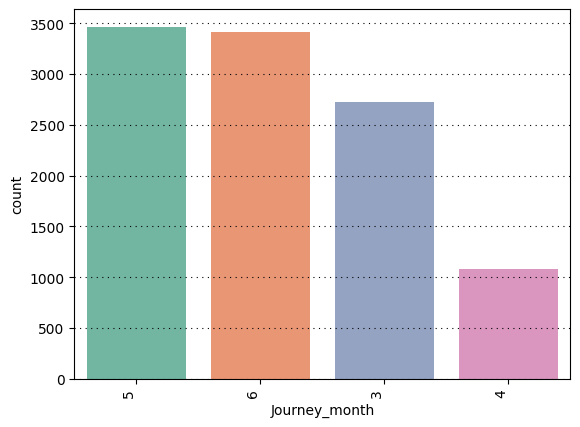

In [32]:
for col in ['Airline','Source','Destination','Total_Stops','Journey_month']:
  ax=sns.countplot(data=df,x=col,palette='Set2',order=df[col].value_counts().index)
  plt.xticks(rotation=90, ha='right')
  plt.grid(axis='y',ls=':',color='black',dashes=(1,4))
  plt.show()

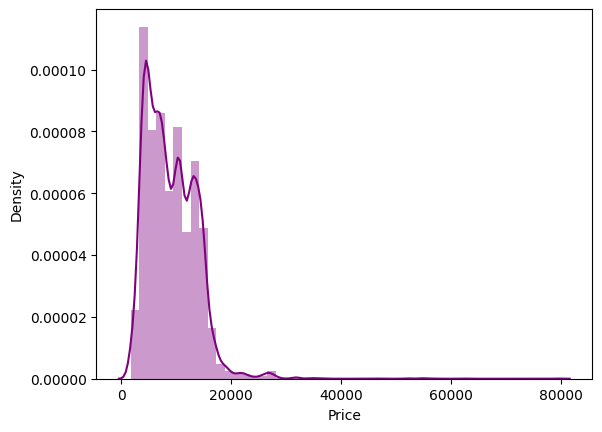

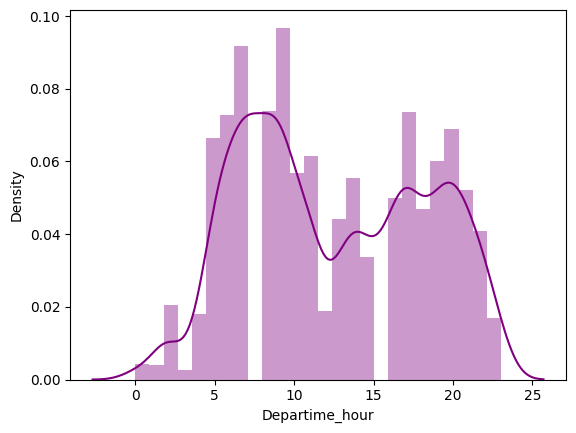

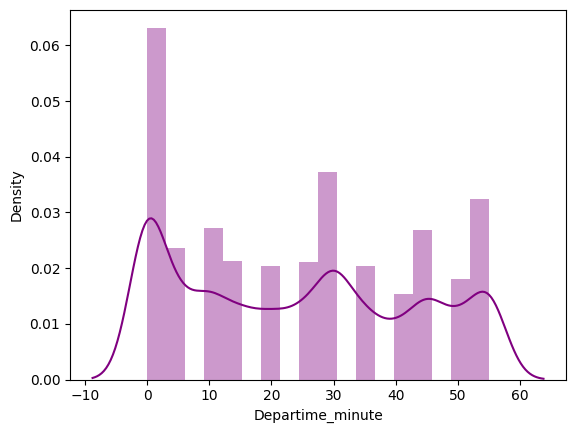

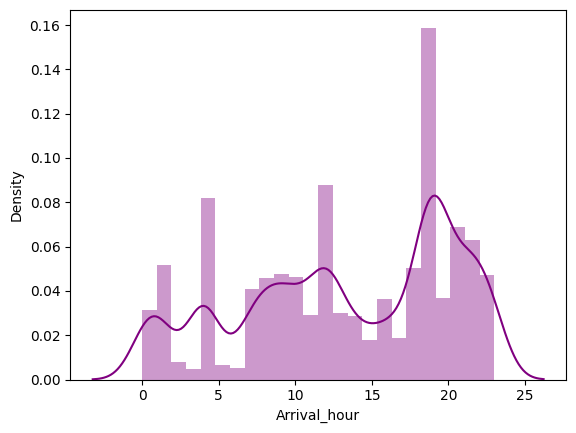

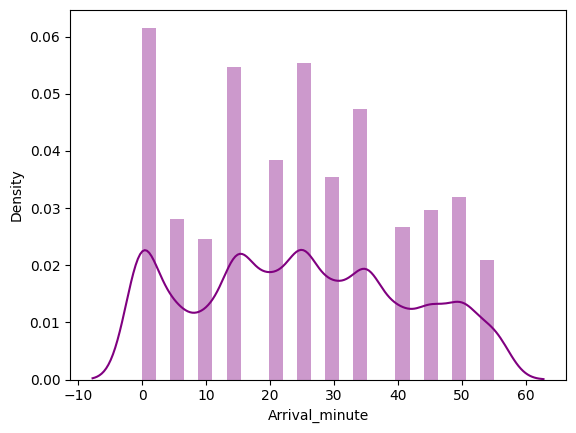

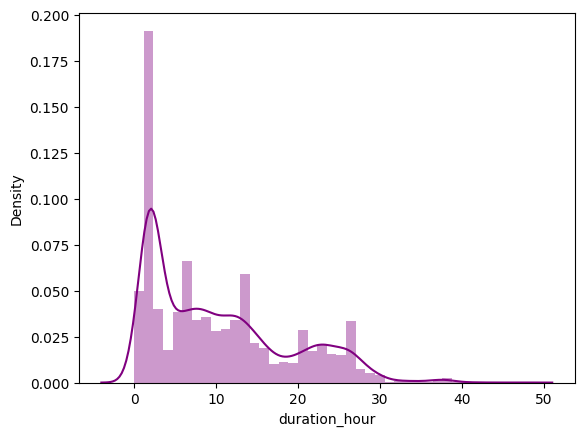

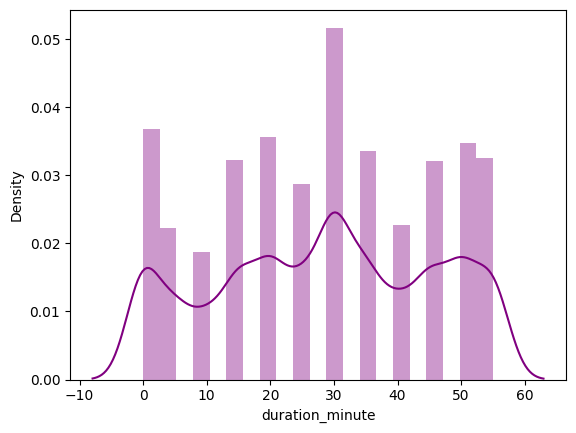

In [33]:
for col in df.columns:
  if df[col].dtype!='O' and df[col].nunique()>10:
    sns.distplot(x=df[col],color='purple')
    plt.xlabel(col)
    plt.show()

## Bivariate Analysis

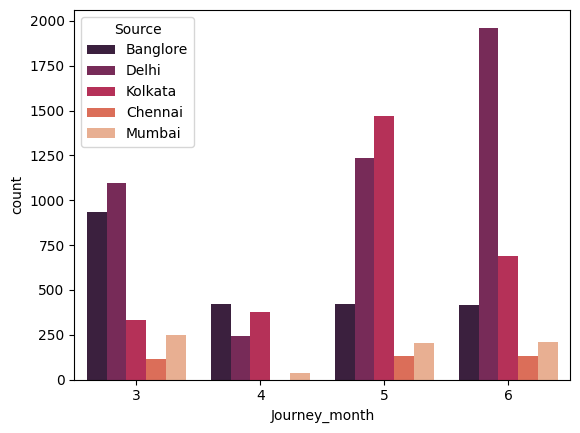

In [34]:
sns.countplot(x=df['Journey_month'],hue=df['Source'],palette='rocket',)
plt.show()

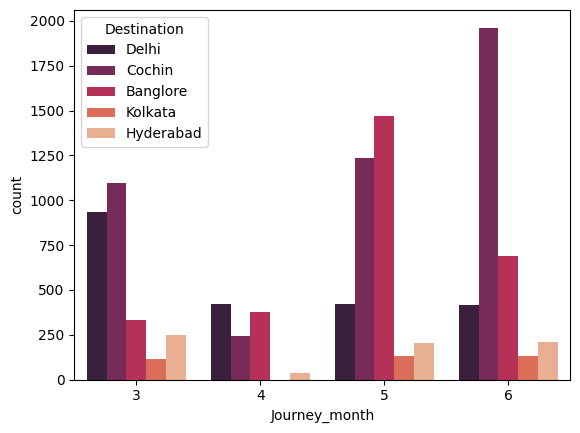

In [35]:
sns.countplot(x=df['Journey_month'],hue=df['Destination'],palette='rocket',)
plt.show()

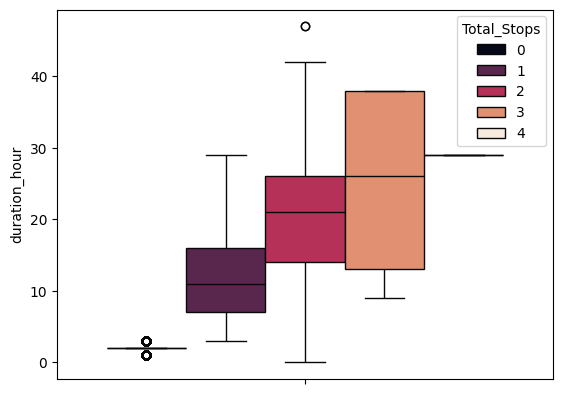

In [36]:
sns.boxplot(y=df['duration_hour'],hue=df['Total_Stops'],palette='rocket')
plt.show()

<Axes: >

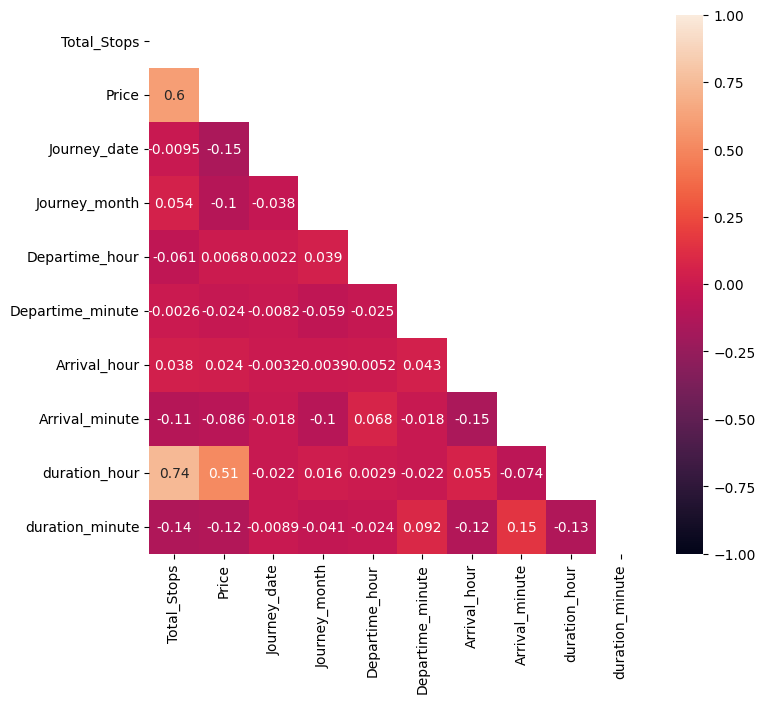

In [37]:
# Heatmap
cor=df.corr(numeric_only=True)
cor

upper=np.triu(cor)

plt.figure(figsize=(8,7))
sns.heatmap(cor,
            annot=True,
            mask=upper,
            vmin=-1,vmax=1)

## Observation

- Passanger travelling in Jet Airways count is comparitevely high with respect to other Airlines.
- We could clearly see that in the year 2019 passenger from Delhi Airport- the count of departure is likely more, hence more facility can be arranged or increase in the number of airplanes from Delhi.
- It is clearly seen that people doesn't prefer connecting flights for short distance, rather they take direct flight.
- People travel the least in the month of April compared to March,May,June
- People mostly take flights from Delhi or Kolkata in the month of May,June.The Analysis can be done for the whole year for more clear view.
- It is clear that people travel for longer distance takes connecting flights.



# Preprocessing

## Train test split

In [38]:
# dependent and independent variables
x=df.drop('Price',axis=1)
y=df[['Price']]

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [39]:
print(f'The training dataset consist of {x_train.shape[0]} rows.')

The training dataset consist of 8545 rows.


In [40]:
print(f'The training dataset consist of {x_test.shape[0]} rows.')

The training dataset consist of 2137 rows.


## Encoding
- One Hot Encoding

In [41]:
# list of categorical column
cat_column=['Airline','Source','Destination']


# training dataset

encoder=OneHotEncoder(sparse_output=False,drop='first',dtype='int')
x_train_encoded_array=encoder.fit_transform(x_train[cat_column])
encoded_xtrain=pd.DataFrame(x_train_encoded_array,index=x_train.index,columns=encoder.get_feature_names_out())

# testing dataset

x_test_encoded_array=encoder.transform(x_test[cat_column])
encoded_xtest=pd.DataFrame(x_test_encoded_array,index=x_test.index,columns=encoder.get_feature_names_out())

In [42]:
# final training and testing independent variables

final_xtrain=pd.concat([encoded_xtrain,x_train.drop(cat_column,axis=1)],axis=1)
final_xtest=pd.concat([encoded_xtest,x_test.drop(cat_column,axis=1)],axis=1)

## Feature Importance
- Analysing the feature Importance for the dataset

In [43]:
from sklearn.ensemble import ExtraTreesRegressor

selection=ExtraTreesRegressor()
selection.fit(final_xtrain,y_train)

ExtraTreesRegressor()

In [44]:
selection.feature_importances_

array([1.03190955e-02, 1.90365823e-03, 1.79811777e-02, 1.35716755e-01,
       7.03319329e-02, 2.11346261e-02, 1.01399585e-03, 5.01091532e-03,
       1.98226014e-04, 4.22735570e-03, 1.08545638e-05, 5.60422596e-04,
       7.39712792e-03, 4.56593725e-03, 8.21305073e-03, 5.23149101e-03,
       1.40687378e-02, 7.48140817e-03, 5.70506538e-04, 2.56263548e-01,
       1.37123701e-01, 5.73493351e-02, 2.51027985e-02, 2.27642902e-02,
       2.88462578e-02, 2.03923240e-02, 1.16813832e-01, 1.94066379e-02])

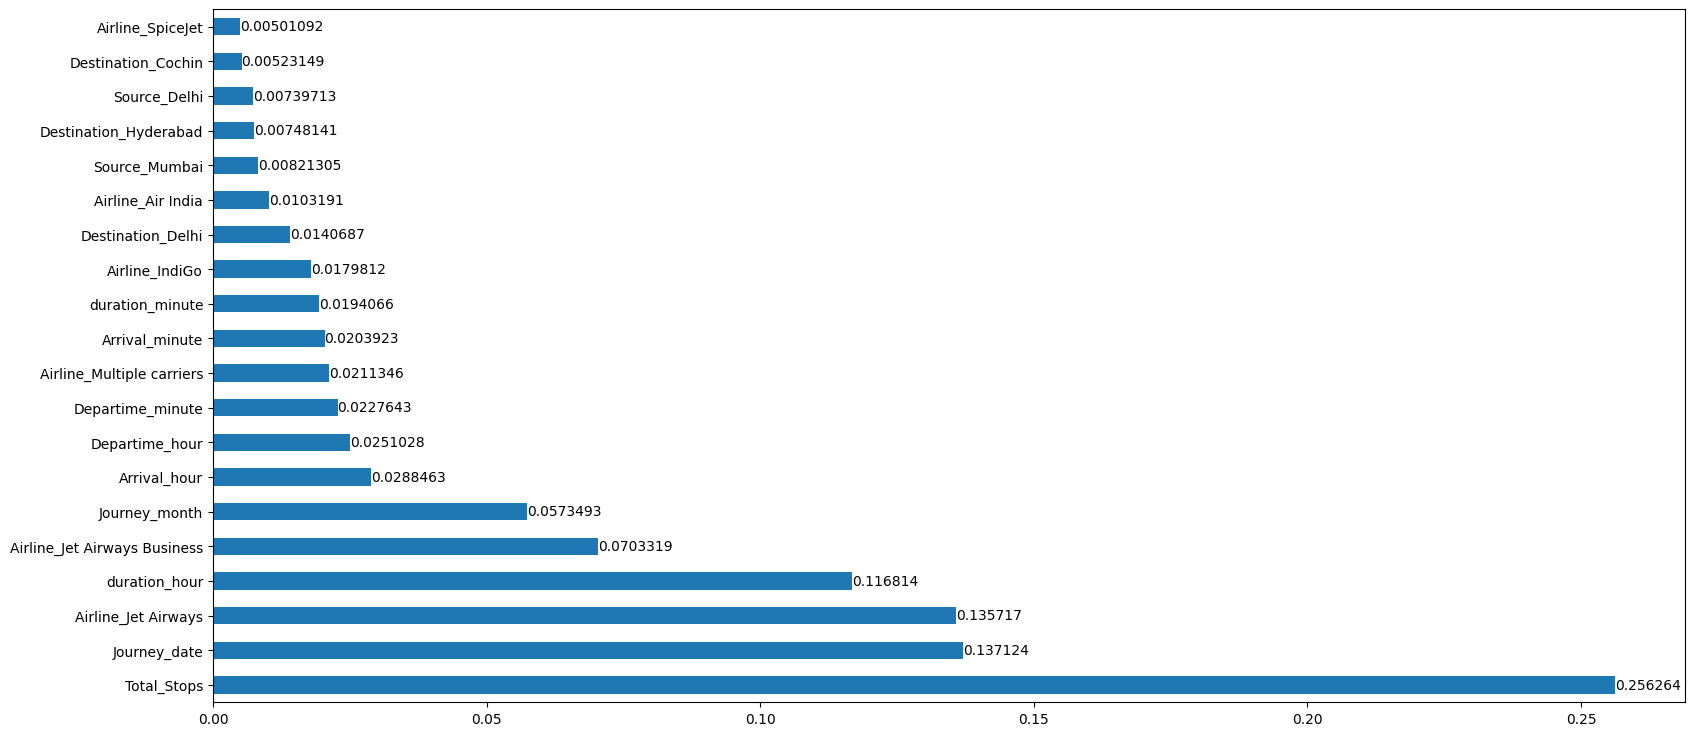

In [45]:
plt.figure(figsize=(19,9))
feature_importance=pd.Series(selection.feature_importances_,index=final_xtrain.columns)
ax=feature_importance.nlargest(20).plot(kind='barh')
ax.bar_label(ax.containers[0])
plt.show()

# Model  Selection

## Hyper Parameter Tuning

In [46]:
# Convergence region

reg_model=RandomForestRegressor(n_jobs=-1,random_state=42,oob_score=True,warm_start=True)

oob_error={}
for tree in [250,275,285,300,325,350,375,400,450]:
  reg_model.set_params(n_estimators=tree)
  reg_model.fit(final_xtrain,y_train)
  error=1-reg_model.oob_score_
  oob_error[tree]=error

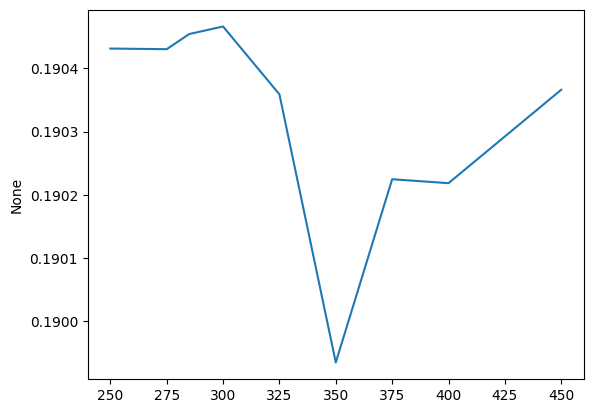

In [47]:
# Plot oob_error vs corresponding Tree
error_rate=pd.Series(oob_error)
sns.lineplot(x=[250,275,285,300,325,350,375,400,450],y=error_rate)
plt.show()

In [48]:
# Hyper Parameter Turning

model=RandomForestRegressor(warm_start=True,random_state=42)
parameters={'n_estimators':range(200,501,50),
            'criterion':['squared_error', 'absolute_error']}

cv_model=GridSearchCV(estimator=model,
                      param_grid=parameters,
                      cv=5,n_jobs=-1,
                      verbose=1)
cv_model.fit(final_xtrain,y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'n_estimators': range(200, 501, 50)},
             verbose=1)

In [49]:
# Grid Search CV observation

print("Hyperparameter Tuning Result",'\n')
print("Best Estimator/Parameter")
print(cv_model.best_estimator_,'\n')
print("Best Score through GridSearchCV")
print(cv_model.best_score_)

Hyperparameter Tuning Result 

Best Estimator/Parameter
RandomForestRegressor(n_estimators=300, random_state=42, warm_start=True) 

Best Score through GridSearchCV
0.8061690419388763


# Final Model

In [50]:
# Final Model

final_model=RandomForestRegressor(n_estimators=300,criterion='absolute_error')
final_model.fit(final_xtrain,y_train)


RandomForestRegressor(criterion='absolute_error', n_estimators=300)

In [51]:
# Model prediction-xtest

y_pred=final_model.predict(final_xtest)

print('Training Score : ')
print(final_model.score(final_xtrain,y_train)*100,'\n')
print('Training Score : ')
print(final_model.score(final_xtest,y_test)*100)

Training Score : 
94.77252209645407 

Training Score : 
82.71813255879789


In [52]:
# Model Metrics - Prediction analysis

print('R2 score : ')
print(r2_score(y_test,y_pred),'\n')
print('Mean Absolute Error : ')
print(mean_absolute_error(y_test,y_pred),'\n')
print('Mean Squared Error : ')
print(mean_squared_error(y_test,y_pred),'\n')
print('Root Mean Squared Error : ')
print(root_mean_squared_error(y_test,y_pred),'\n')

R2 score : 
0.827181325587979 

Mean Absolute Error : 
1164.4760778349712 

Mean Squared Error : 
3726325.991538976 

Root Mean Squared Error : 
1930.3693925098833 



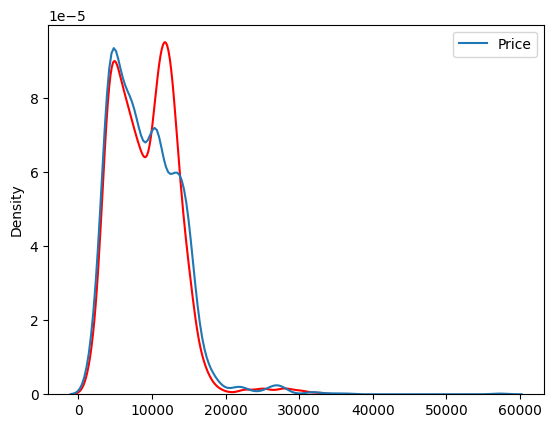

In [53]:
sns.kdeplot(y_pred,color='red')
sns.kdeplot(y_test,color='grey')
plt.show()

# Downloading the required object for deployment

In [54]:
import pickle

In [55]:
# variable for file name - Encoder
filename1='encoder_file.pkl'

# performing serialization and file operation
pickle.dump(encoder,open(filename1,'wb'))

In [56]:
# model
filename2='model_file.pkl'

# performing serialization and file operation
pickle.dump(final_model,open(filename2,'wb'))